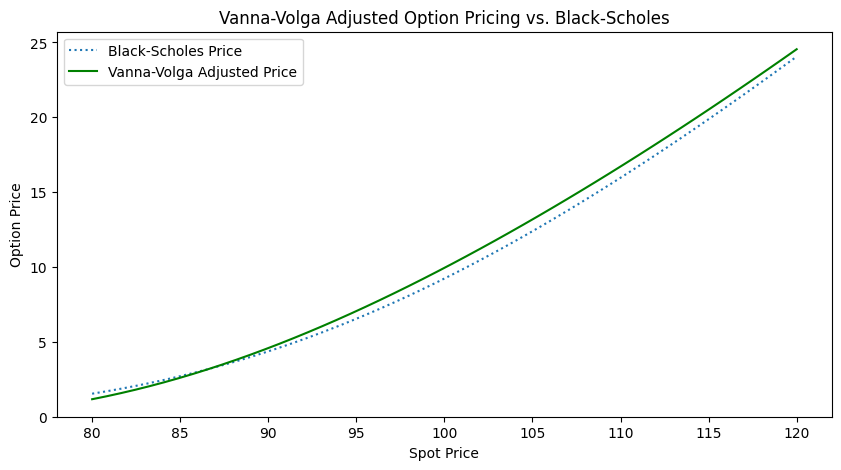

In [1]:
# Vanna-Volga Adjustment for Pricing

import sys
sys.path.append('../src')  # Ensure src directory is accessible

import numpy as np
import matplotlib.pyplot as plt
from vanna_volga import VannaVolga

# Define parameters
spot_prices = np.linspace(80, 120, 50)
strike_price = 100
time_to_maturity = 1
volatility = 0.2
domestic_rate = 0.05
foreign_rate = 0.02

# Market-implied volatilities (Real data should be used if available)
market_volatility_atm = 0.18  # At-the-money volatility
market_volatility_rr = 0.02   # Risk reversal (market skew)
market_volatility_bf = 0.01   # Butterfly spread

vv_prices = []
bs_prices = []

# Compute Vanna-Volga and Black-Scholes prices
for S in spot_prices:
    vv_model = VannaVolga(S, strike_price, time_to_maturity, volatility, domestic_rate, foreign_rate,
                          market_volatility_atm, market_volatility_rr, market_volatility_bf)
    
    bs_prices.append(vv_model.calculate_vanilla_price())
    vv_prices.append(vv_model.vanna_volga_price())

# Plot results
plt.figure(figsize=(10,5))
plt.plot(spot_prices, bs_prices, label="Black-Scholes Price", linestyle="dotted")
plt.plot(spot_prices, vv_prices, label="Vanna-Volga Adjusted Price", linestyle="solid", color="green")
plt.xlabel("Spot Price")
plt.ylabel("Option Price")
plt.title("Vanna-Volga Adjusted Option Pricing vs. Black-Scholes")
plt.legend()
plt.show()
